In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
#import matplotlib.font_manager as fm
from datetime import datetime
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv("total_preprocessed.csv", encoding = "utf-8")

In [ ]:
# date 필드를 datetime 형태로 변환
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['year'] = 0
df['month'] = 0
df['day'] = 0
df['hour'] = 0
df['minute'] = 0
df['second'] = 0
df['date_m'] = 0
df['time_m'] = 0

In [ ]:
for i in range(len(df['date'])):
  df['year'][i] = df['date'][i].year
  df['month'][i] = df['date'][i].month
  df['day'][i] = df['date'][i].day
  df['hour'][i] = df['date'][i].hour
  df['minute'][i] = df['date'][i].minute
  df['second'][i] = df['date'][i].second
  df['date_m'][i] = str(df['year'][i]) + "-" + str(df['month'][i]) + "-" + str(df['day'][i])
  df['time_m'][i] = str(df['hour'][i]) + ":" + str(df['minute'][i]) + ":" + str(df['second'][i])


<ipython-input-36-24a3f6f0ddc7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'][i] = df['date'][i].year
<ipython-input-36-24a3f6f0ddc7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'][i] = df['date'][i].month
<ipython-input-36-24a3f6f0ddc7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'][i] = df['date'][i].day
<ipython-input-36-24a3f6f0ddc7>:5: SettingWithCopyWarning: 
A value is trying to be set on 

In [ ]:
df['date_m'] = pd.to_datetime(df['date_m'])

In [ ]:
# 연도별 마약 거래 트윗 수
flow_year = df.groupby(['year']).size()
print(flow_year)

year
2021      572
2022    23885
2023    20261
dtype: int64


In [ ]:
flow_day = df.groupby(['year', 'month', 'day']).size()
print(flow_day)

year  month  day
2021  1      1         2
             2         1
             3         1
             4         1
             6         1
                    ... 
2023  3      27      882
             28     1152
             29     1774
             30      925
             31       33
Length: 529, dtype: int64


In [ ]:
pip install koreanize-matplotlib
import koreanize_matplotlib

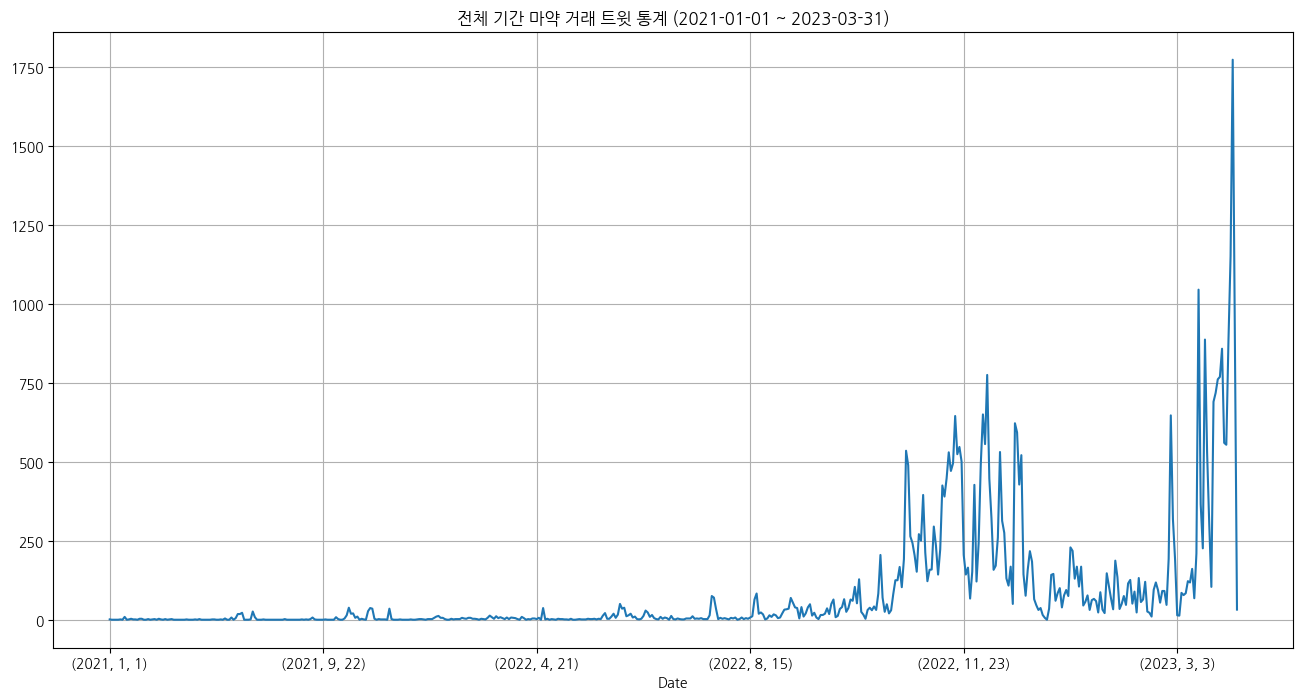

In [ ]:
plt2 = flow_day.plot(figsize = (16,8),grid=True, title="전체 기간 마약 거래 트윗 통계 (2021-01-01 ~ 2023-03-31)",xlabel="Date")

In [ ]:
df_2021 = df[df['date_m'].between('2021-01-01', '2021-03-31')]
df_2022 = df[df['date_m'].between('2022-01-01', '2022-03-31')]
df_2023 = df[df['date_m'].between('2023-01-01', '2023-03-31')]

In [ ]:
flow_2021 = df_2021.groupby(['year', 'month', 'day']).size()
flow_2022 = df_2022.groupby(['year', 'month', 'day']).size()
flow_2023 = df_2023.groupby(['year', 'month', 'day']).size()

In [ ]:
sample_2021 = pd.DataFrame(columns = ['date', 'num'])
sample_2021.loc[0] = ['2021-01-01', flow_2021[flow_2021.index[0]]]

In [ ]:
# 결측일자 (데이터 없는 날) 0으로 셋팅
# 2021년

day = 0

#1월
for i in range(31):
  date = "2021-01"+ "-" + str(i+1)
  date = datetime.strptime(date, "%Y-%m-%d")

  if date == datetime.strptime(str(flow_2021.index[day]), "(%Y, %m, %d)"):
    sample_2021.loc[i] = [date, flow_2021[flow_2021.index[day]]]
    day += 1
  else:
    sample_2021.loc[i] = [date, 0]

#2월
for i in range(28):
  date = "2021-02"+ "-" + str(i+1)
  date = datetime.strptime(date, "%Y-%m-%d")

  if date == datetime.strptime(str(flow_2021.index[day]), "(%Y, %m, %d)"):
    sample_2021.loc[i+31] = [date, flow_2021[flow_2021.index[day]]]
    day += 1
  else:
    sample_2021.loc[i+31] = [date, 0]

#3월
for i in range(30):
  date = "2021-03"+ "-" + str(i+1)
  date = datetime.strptime(date, "%Y-%m-%d")

  if date == datetime.strptime(str(flow_2021.index[day]), "(%Y, %m, %d)"):
    sample_2021.loc[i+31+28] = [date, flow_2021[flow_2021.index[day]]]
    day += 1
  else:
    sample_2021.loc[i+31+28] = [date, 0]

sample_2021.loc[i+31+28+1] = [datetime.strptime("2021-03-31", "%Y-%m-%d"), 0]

In [ ]:
sample_2022 = pd.DataFrame(columns = ['date', 'num'])
sample_2022.loc[0] = ['2022-01-01', flow_2022[flow_2022.index[0]]]

# 결측일자 (데이터 없는 날) 0으로 셋팅
# 2022년

day = 0

#1월
for i in range(31):
  date = "2022-01"+ "-" + str(i+1)
  date = datetime.strptime(date, "%Y-%m-%d")

  if date == datetime.strptime(str(flow_2022.index[day]), "(%Y, %m, %d)"):
    sample_2022.loc[i] = [date, flow_2022[flow_2022.index[day]]]
    day += 1
  else:
    sample_2022.loc[i] = [date, 0]

#2월
for i in range(28):
  date = "2022-02"+ "-" + str(i+1)
  date = datetime.strptime(date, "%Y-%m-%d")

  if date == datetime.strptime(str(flow_2022.index[day]), "(%Y, %m, %d)"):
    sample_2022.loc[i+31] = [date, flow_2022[flow_2022.index[day]]]
    day += 1
  else:
    sample_2022.loc[i+31] = [date, 0]

#3월
for i in range(31):
  date = "2022-03"+ "-" + str(i+1)
  date = datetime.strptime(date, "%Y-%m-%d")

  if date == datetime.strptime(str(flow_2022.index[day]), "(%Y, %m, %d)"):
    sample_2022.loc[i+31+28] = [date, flow_2022[flow_2022.index[day]]]
    day += 1
  else:
    sample_2022.loc[i+31+28] = [date, 0]

In [ ]:
sample_2023 = pd.DataFrame(columns = ['date', 'num'])
sample_2023.loc[0] = ['2023-01-01', flow_2023[flow_2023.index[0]]]

# 결측일자 (데이터 없는 날) 0으로 셋팅
# 2023년

day = 0

#1월
for i in range(31):
  date = "2023-01"+ "-" + str(i+1)
  date = datetime.strptime(date, "%Y-%m-%d")

  if date == datetime.strptime(str(flow_2023.index[day]), "(%Y, %m, %d)"):
    sample_2023.loc[i] = [date, flow_2023[flow_2023.index[day]]]
    day += 1
  else:
    sample_2023.loc[i] = [date, 0]

#2월
for i in range(28):
  date = "2023-02"+ "-" + str(i+1)
  date = datetime.strptime(date, "%Y-%m-%d")

  if date == datetime.strptime(str(flow_2023.index[day]), "(%Y, %m, %d)"):
    sample_2023.loc[i+31] = [date, flow_2023[flow_2023.index[day]]]
    day += 1
  else:
    sample_2023.loc[i+31] = [date, 0]

#3월
for i in range(31):
  date = "2023-03"+ "-" + str(i+1)
  date = datetime.strptime(date, "%Y-%m-%d")

  if date == datetime.strptime(str(flow_2023.index[day]), "(%Y, %m, %d)"):
    sample_2023.loc[i+31+28] = [date, flow_2023[flow_2023.index[day]]]
    day += 1
  else:
    sample_2023.loc[i+31+28] = [date, 0]

In [ ]:
p1 = plt.bar(sample_2021['date'],sample_2021['num'], color='red', alpha=0.5)
p2 = plt.bar(sample_2021['date'],sample_2022['num'], color='blue', alpha=0.5,
             bottom=sample_2021['num'])
plt.xticks(sample_2021['date'])

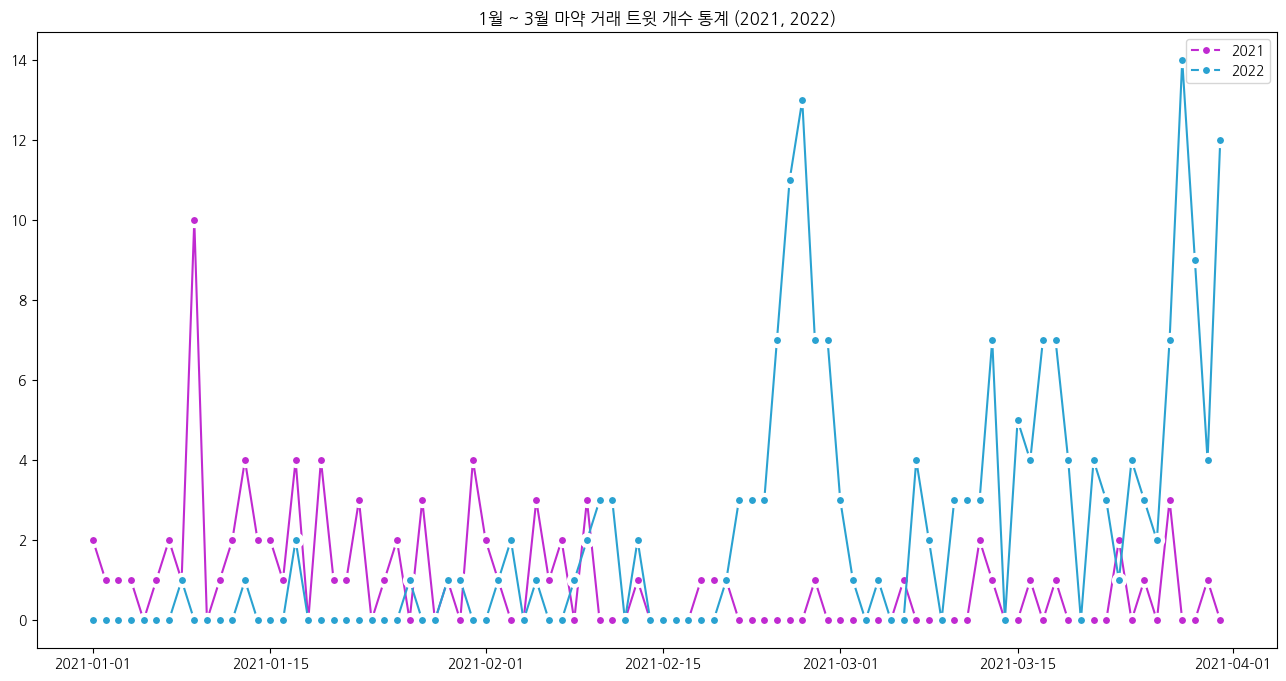

In [ ]:
fig_3 = plt.figure(figsize = (16,8))
ax = fig_3.add_subplot()
ax.plot(sample_2021['date'], sample_2021['num'], color='#c02ad1',
        marker='o',markersize=8, markeredgecolor='white', markeredgewidth=3)
ax.plot(sample_2021['date'], sample_2022['num'], color='#2aa2d1',
        marker='o',markersize=8, markeredgecolor='white', markeredgewidth=3)
plt.title("1월 ~ 3월 마약 거래 트윗 개수 통계 (2021, 2022)")
plt.legend(("2021", "2022"))

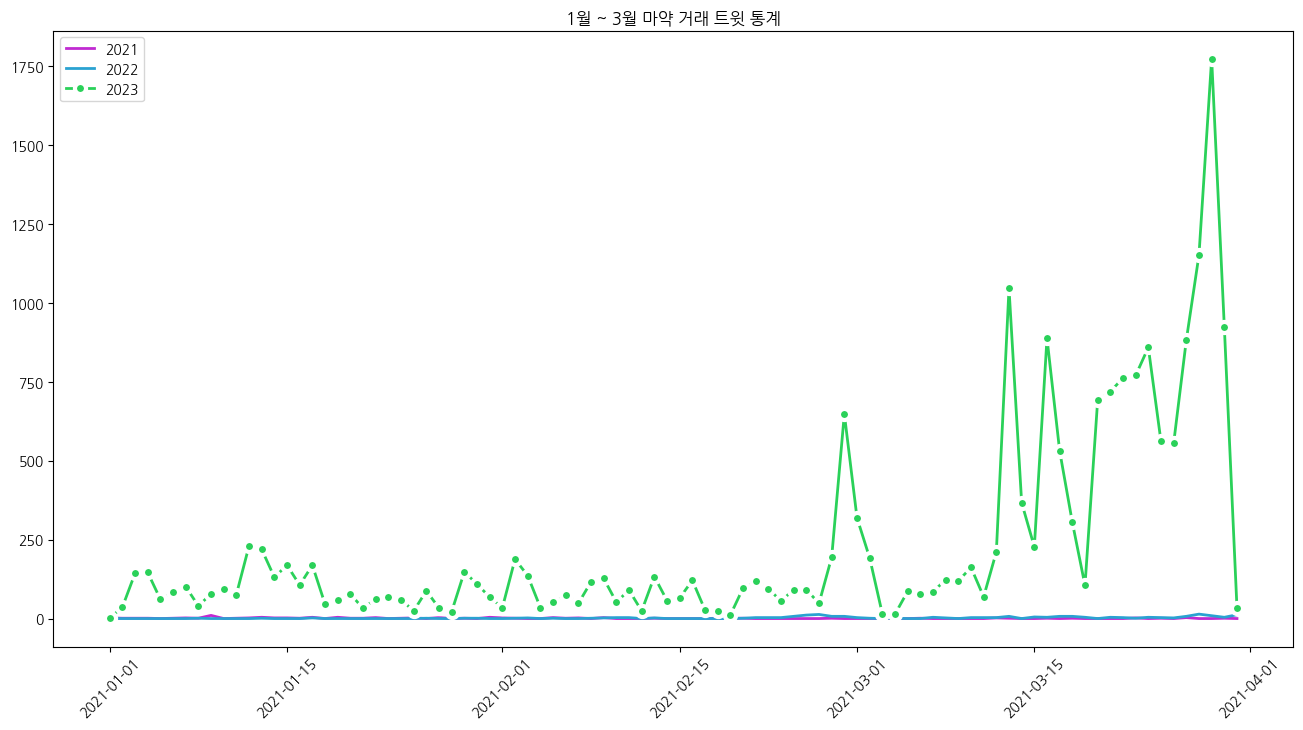

In [ ]:
fig_2 = plt.figure(figsize = (16,8))
ax = fig_2.add_subplot()
ax.plot(sample_2021['date'], sample_2021['num'], color='#c02ad1', linewidth=2)
ax.plot(sample_2021['date'], sample_2022['num'], color='#2aa2d1', linewidth=2)
ax.plot(sample_2021['date'], sample_2023['num'], color='#2ad159', linewidth=2,
        marker='o',markersize=8, markeredgecolor='white', markeredgewidth=3)
plt.xticks(rotation=45)
plt.title("1월 ~ 3월 마약 거래 트윗 통계")
plt.legend(("2021", "2022", "2023"))

[Text(0, 0, '메스암페타민'),
 Text(1, 0, '기타'),
 Text(2, 0, '케타민'),
 Text(3, 0, '대마'),
 Text(4, 0, 'MDMA'),
 Text(5, 0, '아편'),
 Text(6, 0, 'GHB'),
 Text(7, 0, '알킬니트라이트'),
 Text(8, 0, 'LSD'),
 Text(9, 0, '코카인'),
 Text(10, 0, '사일로시빈')]

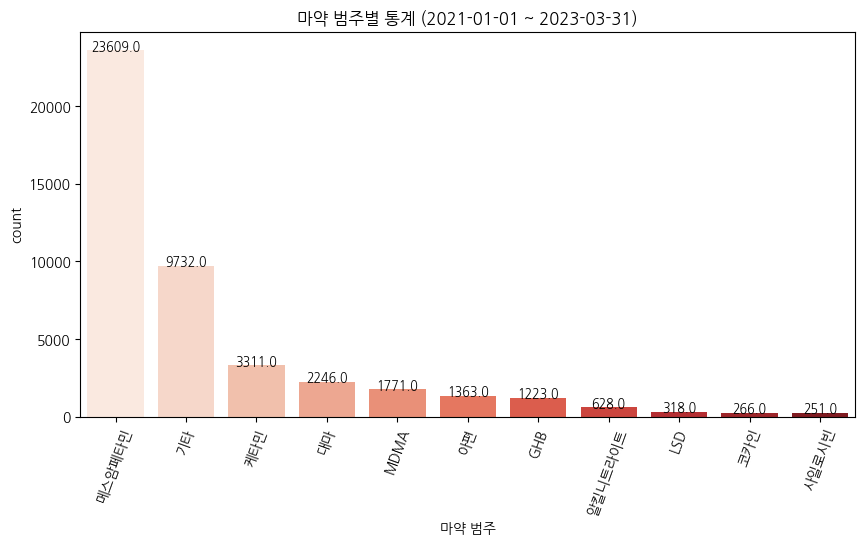

In [ ]:
import unicodedata

plt.figure(figsize = (10,5))
ax3 = sns.countplot( x = 'type1', data = df, order = df['type1'].value_counts().index, palette='Reds')
for p in ax3.patches:
    height = p.get_height()
    ax3.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)

plt.title('마약 범주별 통계 (2021-01-01 ~ 2023-03-31)')
plt.xlabel('마약 범주')
plt.ylabel('count')
plt.xticks(rotation=70)
ax3.set_xticklabels([unicodedata.normalize('NFC','메스암페타민'),'기타','케타민','대마','MDMA','아편', 'GHB','알킬니트라이트','LSD','코카인','사일로시빈'])

[Text(0, 0, '메스암페타민'),
 Text(1, 0, '기타'),
 Text(2, 0, '케타민'),
 Text(3, 0, '대마'),
 Text(4, 0, 'MDMA'),
 Text(5, 0, '아편'),
 Text(6, 0, 'GHB'),
 Text(7, 0, '알킬니트라이트'),
 Text(8, 0, 'LSD'),
 Text(9, 0, '코카인'),
 Text(10, 0, '사일로시빈')]

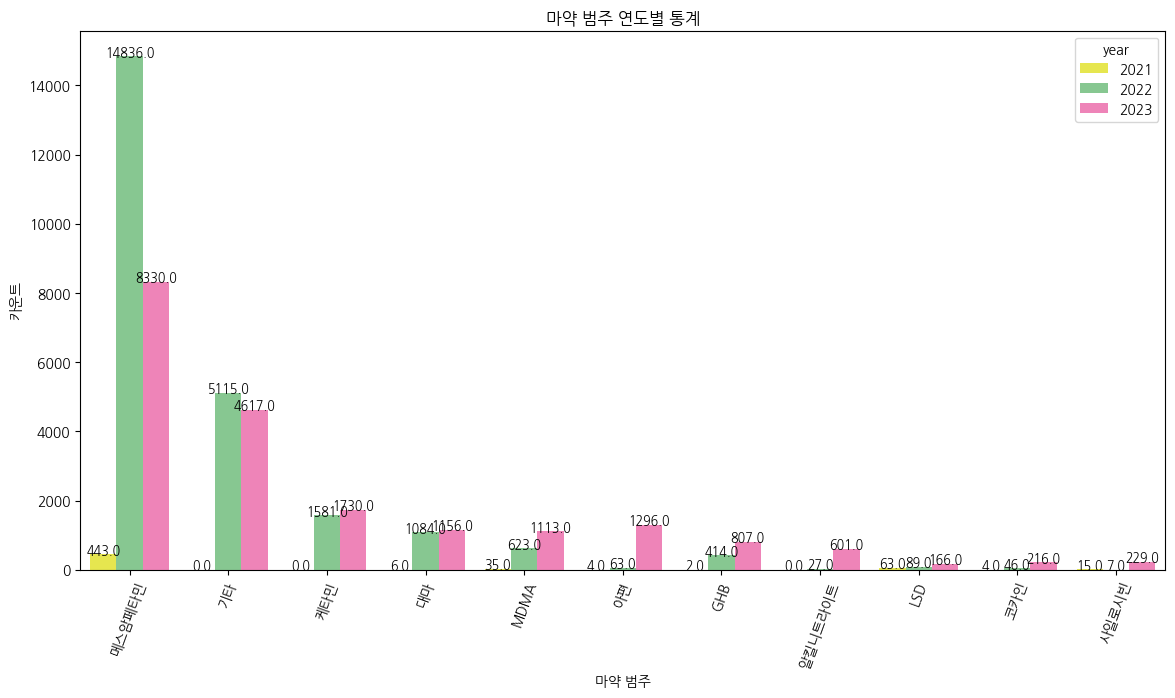

In [ ]:
plt.figure(figsize = (12,6))
colors = ["#FFFF36", "#7dd189", "#FF73B8"]
sns.set_palette(sns.color_palette(colors))
ax3 = sns.countplot( x = 'type1', data = df, hue = 'year', order = df['type1'].value_counts().index)
for p in ax3.patches:
    height = p.get_height()
    ax3.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)

plt.title('마약 범주별 통계 (2021-01-01 ~ 2023-03-31)')
plt.xlabel('마약 범주')
plt.ylabel('카운트')
plt.xticks(rotation=70)


In [ ]:
df.groupby(['type1', 'type2']).size()

In [ ]:
df_메스 = df[df['type1']=='메스암페타민']
df_메스['type2'].unique()

array(['히로뽕', '사끼', '아이스', '크리스탈', '필로폰', '작대기', '아이스술', '떨액',
       '액상떨', '삥두', '시원한술', '빙두', '샤부', '차가운술', '찬술', '북한산아이스'],
      dtype=object)

[Text(0, 0, '아이스'),
 Text(1, 0, '작대기'),
 Text(2, 0, '사끼'),
 Text(3, 0, '차가운술'),
 Text(4, 0, '빙두'),
 Text(5, 0, '액상떨'),
 Text(6, 0, '아이스술'),
 Text(7, 0, '떨액'),
 Text(8, 0, '시원한술'),
 Text(9, 0, '크리스탈'),
 Text(10, 0, '찬술'),
 Text(11, 0, '필로폰'),
 Text(12, 0, '히로뽕'),
 Text(13, 0, '삥두'),
 Text(14, 0, '북한산아이스'),
 Text(15, 0, '샤부')]

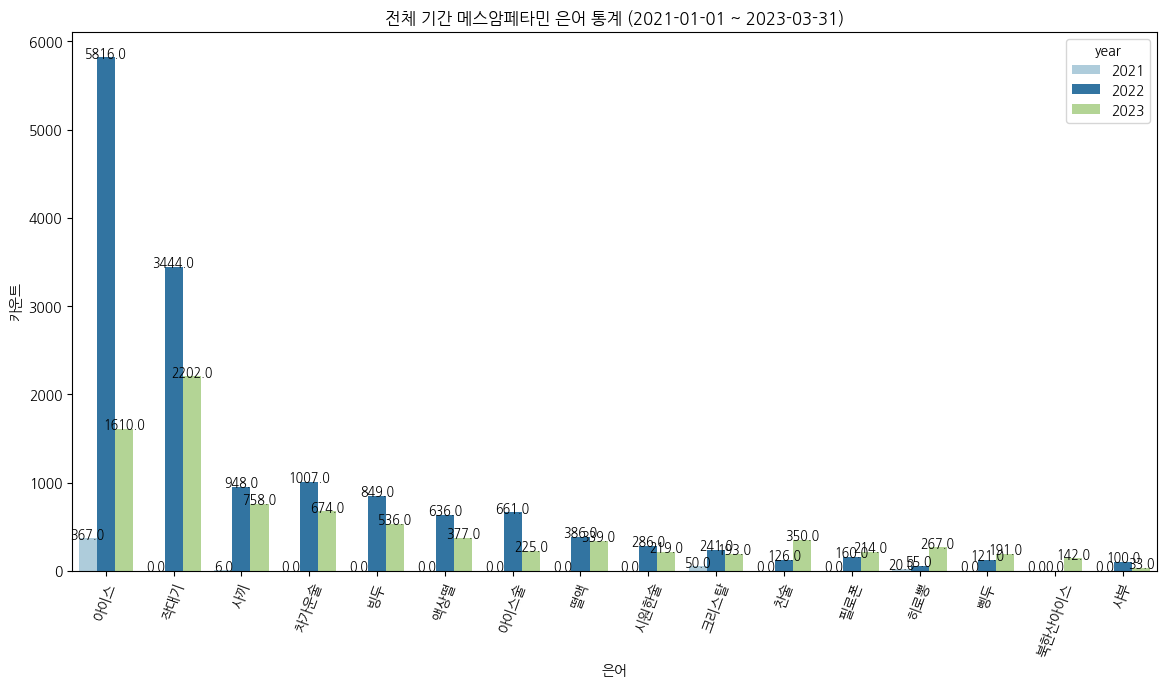

In [ ]:
plt.figure(figsize = (14,7))
colors = ["#FFFF36", "#7dd189", "#FF73B8"]
sns.set_palette(sns.color_palette(colors))
ax3 = sns.countplot( x = 'type2', data = df_메스, hue = 'year', order = df_메스['type2'].value_counts().index,palette='Paired')
for p in ax3.patches:
    height = p.get_height()
    ax3.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)

plt.title('전체 기간 메스암페타민 은어 통계 (2021-01-01 ~ 2023-03-31)')
plt.xlabel('은어')
plt.ylabel('카운트')
plt.xticks(rotation=70)
ax3.set_xticklabels([unicodedata.normalize('NFC','아이스'),'작대기','사끼',unicodedata.normalize('NFC','차가운술'),'빙두','액상떨', '아이스술','떨액','시원한술',unicodedata.normalize('NFC','크리스탈'),unicodedata.normalize('NFC','찬술'), '필로폰', '히로뽕', '삥두', '북한산아이스', '샤부'])

In [ ]:
df_기타

,type1,type2,date,id,user.username,user.displayname,place,user.location,content,likeCount,...,sourceLabel,Unnamed: 0,year,month,day,hour,minute,second,date_m,time_m
577,기타,허브,2022-02-02 19:41:20+00:00,1.488961e+18,yeOSu87,에볼루션룰렛【 ace345 . top 】온라인카지노게임,NaN,대한민국,텔레 icepicks 텔레 icepicks 텔레 icepicks 찬술 크리스탈 작대...,0.0,...,Twitter Web App,87763.0,2022,2,2,19,41,20,2022-02-02,19:41:20
578,기타,허브,2022-02-08 17:50:37+00:00,1.491107e+18,zhdgb,최문종,NaN,NaN,텔레 icepicks 텔레 icepicks 텔레 icepicks 찬술 크리스탈 작대...,0.0,...,Twitter Web App,86529.0,2022,2,8,17,50,37,2022-02-08,17:50:37
583,기타,허브,2022-02-11 10:19:46+00:00,1.492081e+18,II3pzNRGhSoB2IZ,김도형,NaN,NaN,텔레 icepicks 텔레 icepicks 텔레 icepicks 찬술 크리스탈 작대...,0.0,...,Twitter Web App,85993.0,2022,2,11,10,19,46,2022-02-11,10:19:46
587,기타,허브,2022-02-20 00:38:33+00:00,1.495196e+18,setup32,손해석,NaN,서울시 중랑구,정품 입방법 카톡:sld58 텔레Komen68 정품 입 정품 입방법 KKK3약 24...,0.0,...,Botbird tweets,84261.0,2022,2,20,0,38,33,2022-02-20,0:38:33
588,기타,허브,2022-02-21 19:42:57+00:00,1.495847e+18,duswn950420,듀우,NaN,NaN,텔레 icepicks 텔레 icepicks 텔레 icepicks 찬술 크리스탈 작대...,0.0,...,Twitter Web App,83876.0,2022,2,21,19,42,57,2022-02-21,19:42:57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41880,기타,클럽약,2023-03-30 23:11:12+00:00,1.641580e+18,amiedeux,유정민,NaN,NaN,문의 텔레 icepicks 텔레 icepicks 아이스픽2 샘플 20만 아이스작대기...,0.0,...,Twitter Web App,1.0,2023,3,30,23,11,12,2023-03-30,23:11:12
41881,기타,아이스드랍,2023-03-30 23:11:12+00:00,1.641580e+18,amiedeux,유정민,NaN,NaN,문의 텔레 icepicks 텔레 icepicks 아이스픽2 샘플 20만 아이스작대기...,0.0,...,Twitter Web App,1.0,2023,3,30,23,11,12,2023-03-30,23:11:12
41884,기타,브액,2023-03-30 23:11:47+00:00,1.641580e+18,abvet79,카오잠자리,NaN,NaN,텔레 문의 Happy bbong 해피 해피뽕 아이스작대기 전문 딜러 빙두팜 부산아이...,0.0,...,Twitter Web App,0.0,2023,3,30,23,11,47,2023-03-30,23:11:47
41885,기타,클럽약,2023-03-30 23:11:47+00:00,1.641580e+18,abvet79,카오잠자리,NaN,NaN,텔레 문의 Happy bbong 해피 해피뽕 아이스작대기 전문 딜러 빙두팜 부산아이...,0.0,...,Twitter Web App,0.0,2023,3,30,23,11,47,2023-03-30,23:11:47


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '텔레'),
  Text(1, 0, '허브'),
  Text(2, 0, '브액'),
  Text(3, 0, '아이스드랍'),
  Text(4, 0, '파티약'),
  Text(5, 0, '클럽약'),
  Text(6, 0, '주사기'),
  Text(7, 0, '드라퍼'),
  Text(8, 0, '후리베이스'),
  Text(9, 0, '패치')])

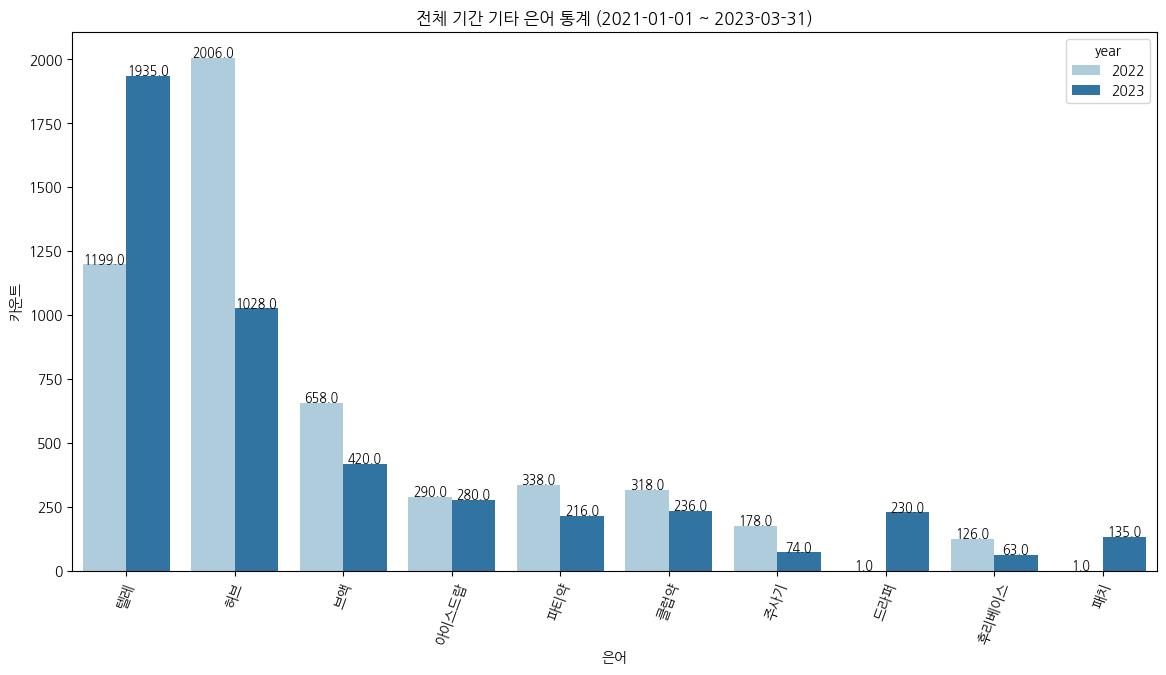

In [ ]:
df_기타 = df[df['type1']=='기타']
df_기타['type2'].unique()

plt.figure(figsize = (14,7))
colors = ["#FFFF36", "#7dd189", "#FF73B8"]
sns.set_palette(sns.color_palette(colors))
ax3 = sns.countplot( x = 'type2', data = df_기타, hue = 'year', order = df_기타['type2'].value_counts().index,palette='Paired')
for p in ax3.patches:
    height = p.get_height()
    ax3.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)

plt.title('전체 기간 기타 은어 통계 (2021-01-01 ~ 2023-03-31)')
plt.xlabel('은어')
plt.ylabel('카운트')
plt.xticks(rotation=70)
#ax3.set_xticklabels([unicodedata.normalize('NFC','아이스'),'작대기','사끼',unicodedata.normalize('NFC','차가운술'),'빙두','액상떨', '아이스술','떨액','시원한술',unicodedata.normalize('NFC','크리스탈'),unicodedata.normalize('NFC','찬술'), '필로폰', '히로뽕', '삥두', '북한산아이스', '샤부'])